# Problem 1
### Air Pressure System Failure in Scania Trucks

In [1]:
import pandas as pd
import numpy as np
import os
from fancyimpute import KNN
# reading testing and training
root_path = os.path.join(os.getcwd(),"DataSet") # root path 
path_test = os.path.join(root_path,"aps_failure_test_set.csv") # path of the testing set
path_training = os.path.join(root_path,"aps_failure_training_set.csv") # path of the training set

#Reading data sets
print(root_path)
df_test = pd.read_csv(path_test)
df_training = pd.read_csv(path_training)
df_training

Using TensorFlow backend.


/Users/francisco/Desktop/Org_Desktop/Fall_2018/Data_Mining/HW/HW1/ipython/DataSet


class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
5       neg   38312     na  2130706432    218      0      0      0      0   
6       neg      14      0           6     na      0      0      0      0   
7       neg  102960     na  2130706432    116      0      0      0      0   
8       neg   78696     na           0     na      0      0      0      0   
9       pos  153204      0         182     na      0      0      0      0   
10      neg   39196     na         204    170      0      0      0      0   
11      neg   45912     na           0    454      0      0      0      0   
12      neg    2104     na          36     26      0      0      0      0   
13      neg  118950     na        1390   1298      0      0      0      0   
14      neg   24416     na           0     na      0      0      0      0   
15      neg      14      0          62     34      0      0      0      0   
16      neg   31300      0         784    740      0      0      0      0   
17      neg     736      2          24     22     16     20      0      0   
18      neg     332     na  2130706432     20      0      0      0      0   
19      neg    1432     na  2130706440     82      0      0      0      0   
20      neg   41212      0  2130706434    104    104    172      0      0   
21      neg      14     na           6      6      0      0      0      0   
22      neg  157128     na  2130706456    424      0      0      0      0   
23      pos  453236     na        2926     na      0      0      0      0   
24      neg   58246     na  2130706432   2416      0      0      0      0   
25      neg   29394     na           0     na      0      0      0      0   
26      neg    8690     na         476    364      0      0      0      0   
27      neg   46978     na         334    322      0      0      0      0   
28      neg    1870     na          na     na      0      0      0      0   
29      neg   12516      0         120     na      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59970   neg      16      0           8     na      0      0      0      0   
59971   neg   39026     na         202    168      0      0      0      0   
59972   neg      14     na          24     20      0      0      0      0   
59973   neg    3248      8          16     10      0      0      0      0   
59974   neg   83818     na         552    532      0      0      0      0   
59975   neg   40274     na          98     94      0      0      0      0   
59976   neg   16978     na  2130706434   1750      0      0      0      0   
59977   neg   30320     na        1838   1278      0      0      0      0   
59978   neg   38414     na         888    758      0      0      0      0   
59979   neg      18      0  2130706432     18      0      0      0      0   
59980   neg     562      0           4      4      0      0      0      0   
59981   neg      16     na          20     20      0      0      0      0   
59982   neg   10628     na  2130706434     98      0      0      0      0   
59983   neg   39004     na          90     84      0      0      0      0   
59984   neg   33386     na         812    744      0      0      0      0   
59985   neg   10792     na         784    608      0      0      0      0   
59986   neg     644     na          12     na      0      0      0      0   
59987   neg   41330     na  2130706432    744      0      0      0      0   
59988   neg    6078     na          52     46      0      0      0      0   
59989   neg   61478     na         134      0      0      0      0      0   
59

## Visualizing distribution of missing values

In [2]:
import missingno as msno #library used to visualize missing values. (reusing code)
df_test_replaced_nan = df_test.replace(to_replace='na',value=np.nan) # replacing 'na' with NaN (easier read)
df_training_replaced_nan = df_training.replace(to_replace='na',value=np.nan)

print("Test Data Set Missing Values")
print(df_test_replaced_nan.info())
msno.matrix(df_test_replaced_nan)

Test Data Set Missing Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 20.9+ MB
None


Training Data Set Missing Values
             aa_000
count  6.000000e+04
mean   5.933650e+04
std    1.454301e+05
min    0.000000e+00
25%    8.340000e+02
50%    3.077600e+04
75%    4.866800e+04
max    2.746564e+06
(60000, 171)


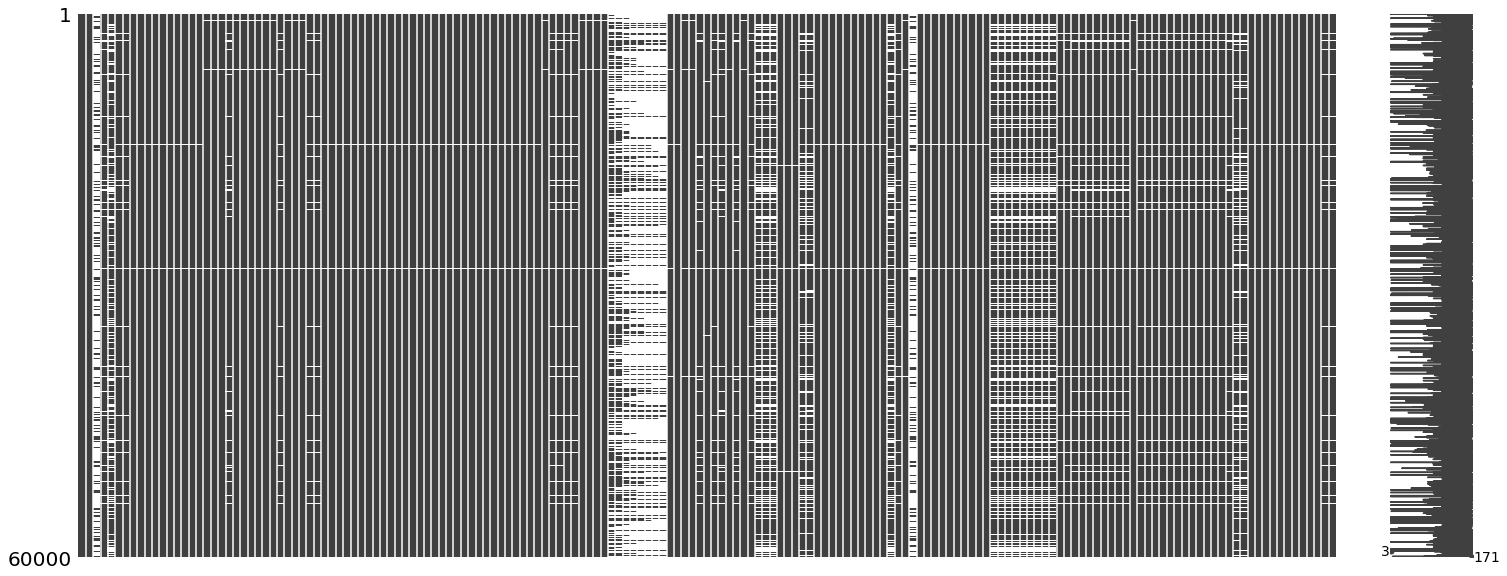

In [3]:
print("Training Data Set Missing Values")
print(df_training_replaced_nan.describe())
print(df_training_replaced_nan.shape)
msno.matrix(df_training_replaced_nan)

## Missing value total

In [4]:

# function for counting number of na
#parameters: DataFrame
def count_na(df):
    total = 0
    for col in df:
        # If you wish to see all of the missing values for every column then uncomment the print statements
        #print("---------------")
        #print("Column "+col+" na total: ")
        #print(df[col].isnull().sum())
        total+=df[col].isnull().sum()
        #print("---------------")
        #print("\n")
    return total
test_total_missing_values = count_na(df_test_replaced_nan)
training_total_missing_values = count_na(df_training_replaced_nan)
print("The total number of missing values for the testing set is: %d" %test_total_missing_values)
print("The total number of missing values for the training set is: %d" %training_total_missing_values)

The total number of missing values for the testing set is: 228680
The total number of missing values for the training set is: 850015


## Percentages Function

In [5]:
from collections import Counter
# This function gives the percentage of a certain val in a column
#Parameters:
#df --> Data Frame
# col --> column of interest
# val --> value to count occurences
def col_val_percentage(df,col,val=None): # calculate the percentage of missing values for a given column name
    total = len(df[col])
    if(val == None): # Missing values
        num_val = df[col].isnull().sum()
    else: # Other values
        num_val = Counter(df[col])[val]
    return (num_val/(1.0*total))

#df_training_replaced_nan['ab_000'].isnull().sum()/(1.0*len(df_training_replaced_nan['ab_000']))
#col_val_percentage(df_test_replaced_nan,'ab_000','0')

## Eliminate columns given percentages

In [6]:
def get_drop_col(df,na_percent =0.25,zero_percent=0.5):
    drop_ls = [] # list of columns to drop
    for col in df:
        # getting percentages for every column
        (col_na_percent,col_zero_percent) = (col_val_percentage(df,col),col_val_percentage(df,col,'0'))
        
        if(col_na_percent > na_percent or col_zero_percent > zero_percent):
            drop_ls.append(col)
        print((col_na_percent,col_zero_percent,col_na_percent > na_percent or col_zero_percent > zero_percent))

    return(drop_ls)
            

In [7]:
df_training_replaced_nan_copy= df_training_replaced_nan.copy()
print(df_training_replaced_nan.shape)
dropped_ls = get_drop_col(df_training_replaced_nan)
dropped_ls
df_dropped = df_training_replaced_nan.drop(dropped_ls,axis=1)
df_dropped.shape

(60000, 171)
(0.0, 0.0, False)
(0.0, 0.0, False)
(0.77215, 0.18295, True)
(0.05558333333333333, 0.14586666666666667, False)
(0.24768333333333334, 0.03348333333333333, False)
(0.041666666666666664, 0.9257166666666666, True)
(0.041666666666666664, 0.9246, True)
(0.011183333333333333, 0.98555, True)
(0.011183333333333333, 0.97645, True)
(0.011183333333333333, 0.93635, True)
(0.011183333333333333, 0.7815666666666666, True)
(0.011183333333333333, 0.02175, False)
(0.011183333333333333, 0.03235, False)
(0.011183333333333333, 0.020633333333333333, False)
(0.011183333333333333, 0.26458333333333334, False)
(0.011183333333333333, 0.41818333333333335, False)
(0.011183333333333333, 0.6783, True)
(0.01075, 0.0022166666666666667, False)
(0.010483333333333334, 0.8931333333333333, True)
(0.010483333333333334, 0.7819833333333334, True)
(0.07333333333333333, 0.92045, True)
(0.0107, 0.62455, True)
(0.010483333333333334, 0.6215833333333334, True)
(0.0107, 0.00215, False)
(0.009816666666666666, 0.0023333333

(60000, 108)

## Percentile and Imputation Methods

In [8]:
def drop_percentile(df,per):
    for col in df:
        #df[col].quantile(per)
        d_p = df[df[col] <= df[col].quantile(per)]
    return d_p
d = df_training_replaced_nan.drop('class',axis=1)   
d =drop_percentile(d.astype(np.float),0.99)     
    



df_training_modified = pd.DataFrame(d)  
#df_training_modified
df_training_modified_copy1= df_training_modified.copy(deep=True)
#df_training_modified_copy2= df_training_modified.copy(deep=True)
#df_training_modified_copy3= df_training_modified.copy(deep=True)
#Imputation

def impute_mean(df):
    for col in df:
        df_prime=df[col].dropna() # drop columns
        mean = np.mean(df_prime)
        df_prime = df[col].replace(to_replace=np.nan,value=mean)
        df[col]=df_prime
    return df
            
#imputation using median  
def impute_median(df):
    for col in df:
         # if not the class column
        df_prime=df[col].dropna() # drop columns
        median = np.median(df_prime)
        df_prime = df[col].replace(to_replace=np.nan,value=median)
    return df
def knn_impute(df,k):
    df_filled = pd.DataFrame(KNN(k).complete(df))
    return df_filled

df_mean_imputed = impute_mean(df_training_modified)
df_median_imputed = impute_median(df_training_modified)
df_training_replaced_nan
#df_knn_imputed = knn_impute(df_training_modified_copy3,3)

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698    NaN  2130706438    280      0      0      0      0   
1       neg   33058    NaN           0    NaN      0      0      0      0   
2       neg   41040    NaN         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874    NaN        1368    458      0      0      0      0   
5       neg   38312    NaN  2130706432    218      0      0      0      0   
6       neg      14      0           6    NaN      0      0      0      0   
7       neg  102960    NaN  2130706432    116      0      0      0      0   
8       neg   78696    NaN           0    NaN      0      0      0      0   
9       pos  153204      0         182    NaN      0      0      0      0   
10      neg   39196    NaN         204    170      0      0      0      0   
11      neg   45912    NaN           0    454      0      0      0      0   
12      neg    2104    NaN          36     26      0      0      0      0   
13      neg  118950    NaN        1390   1298      0      0      0      0   
14      neg   24416    NaN           0    NaN      0      0      0      0   
15      neg      14      0          62     34      0      0      0      0   
16      neg   31300      0         784    740      0      0      0      0   
17      neg     736      2          24     22     16     20      0      0   
18      neg     332    NaN  2130706432     20      0      0      0      0   
19      neg    1432    NaN  2130706440     82      0      0      0      0   
20      neg   41212      0  2130706434    104    104    172      0      0   
21      neg      14    NaN           6      6      0      0      0      0   
22      neg  157128    NaN  2130706456    424      0      0      0      0   
23      pos  453236    NaN        2926    NaN      0      0      0      0   
24      neg   58246    NaN  2130706432   2416      0      0      0      0   
25      neg   29394    NaN           0    NaN      0      0      0      0   
26      neg    8690    NaN         476    364      0      0      0      0   
27      neg   46978    NaN         334    322      0      0      0      0   
28      neg    1870    NaN         NaN    NaN      0      0      0      0   
29      neg   12516      0         120    NaN      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59970   neg      16      0           8    NaN      0      0      0      0   
59971   neg   39026    NaN         202    168      0      0      0      0   
59972   neg      14    NaN          24     20      0      0      0      0   
59973   neg    3248      8          16     10      0      0      0      0   
59974   neg   83818    NaN         552    532      0      0      0      0   
59975   neg   40274    NaN          98     94      0      0      0      0   
59976   neg   16978    NaN  2130706434   1750      0      0      0      0   
59977   neg   30320    NaN        1838   1278      0      0      0      0   
59978   neg   38414    NaN         888    758      0      0      0      0   
59979   neg      18      0  2130706432     18      0      0      0      0   
59980   neg     562      0           4      4      0      0      0      0   
59981   neg      16    NaN          20     20      0      0      0      0   
59982   neg   10628    NaN  2130706434     98      0      0      0      0   
59983   neg   39004    NaN          90     84      0      0      0      0   
59984   neg   33386    NaN         812    744      0      0      0      0   
59985   neg   10792    NaN         784    608      0      0      0      0   
59986   neg     644    NaN          12    NaN      0      0      0      0   
59987   neg   41330    NaN  2130706432    744      0      0      0      0   
59988   neg    6078    NaN          52     46      0      0      0      0   
59989   neg   61478    NaN         134      0      0      0      0      0   
59

## Imputation

In [15]:
knn_impute(df_training_modified_copy1[0:10000],3)

Imputing row 1/10000 with 5 missing, elapsed time: 119.658
Imputing row 101/10000 with 7 missing, elapsed time: 119.731
Imputing row 201/10000 with 8 missing, elapsed time: 119.812
Imputing row 301/10000 with 10 missing, elapsed time: 119.891
Imputing row 401/10000 with 5 missing, elapsed time: 119.964
Imputing row 501/10000 with 9 missing, elapsed time: 120.027
Imputing row 601/10000 with 24 missing, elapsed time: 120.094
Imputing row 701/10000 with 22 missing, elapsed time: 120.166
Imputing row 801/10000 with 6 missing, elapsed time: 120.225
Imputing row 901/10000 with 8 missing, elapsed time: 120.285
Imputing row 1001/10000 with 34 missing, elapsed time: 120.347
Imputing row 1101/10000 with 11 missing, elapsed time: 120.427
Imputing row 1201/10000 with 24 missing, elapsed time: 120.500
Imputing row 1301/10000 with 3 missing, elapsed time: 120.571
Imputing row 1401/10000 with 8 missing, elapsed time: 120.640
Imputing row 1501/10000 with 8 missing, elapsed time: 120.706
Imputing row 1

0          1             2            3      4      5    6    7    \
0      76698.0   0.000000  2.130706e+09   280.000000    0.0    0.0  0.0  0.0   
1      33058.0   0.000000  0.000000e+00   202.179617    0.0    0.0  0.0  0.0   
2      41040.0   0.000000  2.280000e+02   100.000000    0.0    0.0  0.0  0.0   
3      60874.0   0.000000  1.368000e+03   458.000000    0.0    0.0  0.0  0.0   
4      38312.0   0.000000  2.130706e+09   218.000000    0.0    0.0  0.0  0.0   
5         14.0   0.000000  6.000000e+00     9.548815    0.0    0.0  0.0  0.0   
6     102960.0   0.000000  2.130706e+09   116.000000    0.0    0.0  0.0  0.0   
7      78696.0   0.000000  0.000000e+00   318.858178    0.0    0.0  0.0  0.0   
8     153204.0   0.000000  1.820000e+02   571.839738    0.0    0.0  0.0  0.0   
9      39196.0   2.006923  2.040000e+02   170.000000    0.0    0.0  0.0  0.0   
10     45912.0   1.297001  0.000000e+00   454.000000    0.0    0.0  0.0  0.0   
11      2104.0   0.000000  3.600000e+01    26.000000    0.0    0.0  0.0  0.0   
12    118950.0   0.000000  1.390000e+03  1298.000000    0.0    0.0  0.0  0.0   
13     24416.0   1.320639  0.000000e+00   101.883984    0.0    0.0  0.0  0.0   
14        14.0   0.000000  6.200000e+01    34.000000    0.0    0.0  0.0  0.0   
15     31300.0   0.000000  7.840000e+02   740.000000    0.0    0.0  0.0  0.0   
16       736.0   2.000000  2.400000e+01    22.000000   16.0   20.0  0.0  0.0   
17       332.0   1.298821  2.130706e+09    20.000000    0.0    0.0  0.0  0.0   
18      1432.0   1.511578  2.130706e+09    82.000000    0.0    0.0  0.0  0.0   
19     41212.0   0.000000  2.130706e+09   104.000000  104.0  172.0  0.0  0.0   
20        14.0   2.000000  6.000000e+00     6.000000    0.0    0.0  0.0  0.0   
21    157128.0   0.906431  2.130706e+09   424.000000    0.0    0.0  0.0  0.0   
22    453236.0   0.000000  2.926000e+03  1436.822953    0.0    0.0  0.0  0.0   
23     58246.0   2.102336  2.130706e+09  2416.000000    0.0    0.0  0.0  0.0   
24     29394.0   1.411876  0.000000e+00   312.387672    0.0    0.0  0.0  0.0   
25      8690.0   0.728846  4.760000e+02   364.000000    0.0    0.0  0.0  0.0   
26     46978.0   1.487173  3.340000e+02   322.000000    0.0    0.0  0.0  0.0   
27      1870.0   1.412071  6.238866e+08    64.495403    0.0    0.0  0.0  0.0   
28     12516.0   0.000000  1.200000e+02    31.121676    0.0    0.0  0.0  0.0   
29     86240.0  22.845158  1.520000e+02   146.000000    0.0    0.0  0.0  0.0   
...        ...        ...           ...          ...    ...    ...  ...  ...   
9970   39192.0   0.000000  1.960000e+02   194.000000    0.0    0.0  0.0  0.0   
9971   41198.0   1.199743  1.254000e+03  1096.000000    0.0    0.0  0.0  0.0   
9972   31074.0   0.000000  3.108000e+03  2874.000000    0.0    0.0  0.0  0.0   
9973      28.0   0.659314  2.800000e+01    26.000000    0.0    0.0  0.0  0.0   
9974  117644.0   1.499645  0.000000e+00  1416.641064    0.0    0.0  0.0  0.0   
9975   52432.0   0.000000  5.300000e+02   496.000000    0.0    0.0  0.0  0.0   
9976    1418.0   0.692615  9.600000e+01    96.000000    0.0    0.0  0.0  0.0   
9977    5580.0   3.964341  0.000000e+00   142.128082    0.0    0.0  0.0  0.0   
9978   38270.0   0.000000  2.130706e+09   110.000000    0.0    0.0  0.0  0.0   
9979   40994.0   0.000000  0.000000e+00   453.884465    0.0    0.0  0.0  0.0   
9980     340.0   6.000000  4.200000e+01    22.000000    0.0    0.0  0.0  0.0   
9981     726.0   0.000000  2.130706e+09    14.000000    0.0    0.0  0.0  0.0   
9982   31660.0   2.452672  2.860000e+02   286.000000    0.0    0.0  0.0  0.0   
9983       8.0   0.000000  1.600000e+01    16.000000    0.0    0.0  0.0  0.0   
9984   30746.0   0.503362  2.130706e+09   888.000000    0.0    0.0  0.0  0.0   
9985   41612.0   0.537650  2.130706e+09   356.000000    0.0    0.0  0.0  0.0   
9986  308726.0   0.598090  3.026000e+03   890.261512    0.0    0.0  0.0  0.0   
9987   30392.0   1.607311  0.000000e+00   512.383717    0.0    0.0  0.0  0.0   
9988  16506